## Imperial College London
# Research Computing Summer School 2018


# NumPy  (and a little bit of SciPy)

## Presenter: Nicolas Barral

## Learning objectives

  * Learn what numpy arrays are
  * Learn basic array manipulations
  * Learn what vectorial code is
  * A few more advanced features
  * Quick overview of SciPy

## SciPy ecosystem

From their [website](https://scipy.org):
> SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages:
>  * NumPy
>  * SciPy library
>  * Matplotlib 
>  * IPython
>  * Sympy
>  * Pandas

## Introducing NumPy

* NumPy supports:

  * Multidimensional arrays (`ndarray`)
  * Matrices and linear algebra operations
  * Random number generation
  * Fourier transforms
  * Polynomials
  * Tools for integrating with Fortran/C
  
* NumPy provides fast precompiled functions for numerical routines


* https://www.numpy.org/


## NumPy Arrays overview

* Core (or Standard) Python Library provides lists and 1d arrays (array.array)

  * Lists are general containers for objects
  * Arrays are 1d containers for objects of the same type
  * Limited functionality
  * Some memory and performance overhead associated with these structures


* NumPy provides multidimensional arrays (numpy.ndarray)
  * Can store many elements of the same data type in multiple dimensions
  * cf. Fortran/C/C++ arrays
  * More functionality than Core Python e.g. many conveninent methods for array manipulation
  * Efficient storage and execution

See, e.g.,
* http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.ndarray.html
<br>
<br>

## Creating 1d arrays

<br>
Import `numpy` as <i>alias</i> "np"

In [18]:
import numpy as np

There are many ways to create 1d array e.g. from a list

In [3]:
a = np.array([-1, 0, 1])
print(a)

[-1  0  1]


Or from other arrays ("copy constructor")

In [4]:
b = np.array(a)
print(b)

[-1  0  1]


All Numpy arrays are of type '`ndarray`'

In [5]:
type(b)

numpy.ndarray

Arrays can be created using `numpy` functions, e.g.

In [6]:
# arange for arrays (like using range for lists)
a = np.arange( -2, 6, 2 )
print(a)

[-2  0  2  4]


In [7]:
# linspace to create sample step points in an interval
a = np.linspace(-10, 10, 5) 
print(a)

[-10.  -5.   0.   5.  10.]


### <span style="color:blue">Exercice </span>
Can you guess what the following functions do?

In [8]:
b = np.zeros(3)
print(b)

[ 0.  0.  0.]


In [9]:
c = np.ones(3)
print(c)

[ 1.  1.  1.]


In [10]:
d = np.eye(3)
print(d)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


## Array attributes

<br>
As part of the array structure, Numpy keeps track of metadata for the array as "attributes"

In [11]:
# Taking "a" from the previous example
a = np.linspace(-10, 10, 5) 

In [12]:
# Examine key array attributes
print(a)
print("Dimensions ", a.ndim)
print("Shape      ", a.shape)  # number of elements in each dim
print("Size       ", a.size)   # total number of elements
print("Data type  ", a.dtype)  # data type of element e.g. 32 bit float

[-10.  -5.   0.   5.  10.]
Dimensions  1
Shape       (5,)
Size        5
Data type   float64


Data type can be specified at creation:

In [13]:
a = np.array( [1.1,2.2,3.3], np.float32)
print(a)
print("Data type", a.dtype)

[ 1.10000002  2.20000005  3.29999995]
Data type float32


## Multi-dimensional arrays

There are many different ways to create N-dimensional arrays. A two-dimensional array or matrix can be created from, e.g., list of lists

In [29]:
mat = np.array( [[1,2,3], [4,5,6]] )
print(mat)
print("Dimensions: ", mat.ndim)
print("Size:       ", mat.size)
print("Shape:      ", mat.shape)

[[1 2 3]
 [4 5 6]]
Dimensions:  2
Size:        6
Shape:       (2, 3)


`pprint` can be used for fancier display of multi-dimensional arrays:

In [30]:
from pprint import pprint

pprint(mat)

array([[1, 2, 3],
       [4, 5, 6]])


### <span style="color:blue">Exercice </span>

Work out the shape of the resulting arrays before executing the following cells <br>
(HINT: length of the innermost list gives the size of the rightmost shape index)

In [15]:
i = np.array( [[1,1,1], [2,2,2], [3,3,3], [4,4,4]] ) 
print("i", i.shape)

i (4, 3)


In [16]:
j = np.array( [[[1,1],[2,2],[3,3],[4,4]] , [[1,1],[2,2],[3,3],[4,4]], [[1,1],[2,2],[3,3],[4,4]]] )
print("j", j.shape)

j (3, 4, 2)


Can create 2d arrays with complex elements by specifying the data type

In [17]:
alist = [[1, 2, 3], [4, 5, 6]]
mat = np.array(alist, complex)
pprint(mat)

[[ 1.+0.j  2.+0.j  3.+0.j]
 [ 4.+0.j  5.+0.j  6.+0.j]]


## Accessing arrays

Basic indexing and slicing can be used to access array elements, as we know from lists

In [18]:
# a[start:stop:stride] (not inclusive of stop)
a = np.arange(8)     # another function for creating arrays
print("a", a)
print("a[0:7:2]", a[0:7:2])
print("a[0::2]", a[0::2])

a [0 1 2 3 4 5 6 7]
a[0:7:2] [0 2 4 6]
a[0::2] [0 2 4 6]


Negative indices are valid!

In [19]:
# Useful for accessing the last element
print(a[-1])

7


### <span style="color:blue">Exercice </span>

Can you guess the output of the following cell?

In [22]:
print(a[2:-3:2])

[2 4]


For multi-dimensional arrays, tuples or index notations can be used.

In [23]:
# Basic indexing of a 3d array
c = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print("c[1][0][2]:", c[1][0][1]) # using index notation
print("c[1,0,2]:", c[1,0,1])     # using a tuple (more performant)

c[1][0][2]: 6
c[1,0,2]: 6


If the number of indices given is less than the number of axes, missing axes are taken as complete slices

In [24]:
print(c[1]) 
print(c[1,0])   
print(c[1,0,...]) # can use elipsis (3 dots) for missing indices

[[5 6]
 [7 8]]
[5 6]
[5 6]


## Array copies

Simple assignment creates references or 'shallow' copies of arrays

In [25]:
a = np.array( [-2,6,2] )
print("a", a)
b = a
a[0]=20
print("b points to a!", b)

a [-2  6  2]
b points to a! [20  6  2]


Use `copy()` to create a true or 'deep' copy

In [26]:
c = a.copy()
print(a)

[20  6  2]


In [27]:
# check b really is an independent copy of a
c[0]=0
print("c changes", c)
print("a unaffected", a)

c changes [0 6 2]
a unaffected [20  6  2]


## Slices and views

A "view" is an array that refers to another array’s data (like references). You can create a view on an array by selecting a slice of an array. No data is copied when a view is created. 

In [28]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]]) 
pprint(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [29]:
# Can assign a slice to a variable and change the array referred to 
# by the slice
s = a[2:3, 1:3]
print(s)
s[:,:] = -2
print("s", s)
print("a", a)

[[8 9]]
s [[-2 -2]]
a [[ 1  2  3]
 [ 4  5  6]
 [ 7 -2 -2]]


### <span style="color:blue">Exercice </span>

Change all the elements with values 7,8,10,11 in matrix `m` below (i.e. bottom right corner elements) to 1000 using a slice

In [30]:
m = np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])

## Reshaping arrays

The shape of an array can be modified, and/or its size changed:

In [31]:
a = np.arange(6)
print("a", a, ", shape:", a.shape)
# modifying the shape attribute (not a copy) requires
# that the size remains the same
a.shape = (3,2)
pprint(a)

a [0 1 2 3 4 5] , shape: (6,)
[[0 1]
 [2 3]
 [4 5]]


In [32]:
# Or can alter the size and shape of the array with resize().
# May copy/pad depending on shape.
mat = np.arange(6)
print(mat)
mat1 = np.resize(mat, (3, 2))
print(mat1)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]


`base` can be used to check if arrays share the same data (*i.e.* they are not copies):

In [33]:
mat1.base is mat

False

### <span style="color:blue">Exercice </span>

What does the `reshape()` method do?

## Vectorization and operations on arrays

Vectorization is why numpy arrays are great. It allows element-wise operations (avoids writing loops!). What output do the following cells give?

In [39]:
a = np.arange(10).reshape([2,5])
b = np.arange(10).reshape([2,5])
print(a)

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [40]:
# Try these
print(a)
-0.1*a

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([[-0. , -0.1, -0.2, -0.3, -0.4],
       [-0.5, -0.6, -0.7, -0.8, -0.9]])

In [41]:
# This is NOT matrix multiplication!
print(b)
a*b

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

In [42]:
# Use dot product for vector/matrix multiplication
# Note: .T gives you transpose of matrix i.e. reshapes it
a.dot(b.T)

array([[ 30,  80],
       [ 80, 255]])

Be careful: the type of data elements matters here!

In [43]:
# What happens if the astype() is removed?
a/(b+1).astype(float)

array([[ 0.        ,  0.5       ,  0.66666667,  0.75      ,  0.8       ],
       [ 0.83333333,  0.85714286,  0.875     ,  0.88888889,  0.9       ]])

Vectorization also works with functions!

In [80]:
def f(x):
    return x**3

x = numpy.array([1,2,3,4,5,6,7,8,9])
y = f(x)

print(y)

[  1   8  27  64 125 216 343 512 729]


### <span style="color:blue">Exercice </span>

Let $A$ be the two-dimensional array
$$
\mathbf{A} = \left\lbrack\begin{array}{ccc}
2 & 1 & 0\cr
-1 & 2 & 1\cr
0 & -1 & 2
\end{array}\right\rbrack
$$

Implement and apply the function
$$
f(x) = x^3 + xe^x + 1
$$
to $A$. Check that you get what you expect.
 

## Manipulating arrays

There are many methods for manipulating arrays (reshaping, joining, splitting, inserting, ...). Check the documentation.

E.g.,
```python
concatenate((a1,a2),axis=0)
split(a, indices_or_sections, axis=0)
flatten
ravel(a)
stack(arrays[, axis])
tile(a, reps)
repeat(a, repeats[, axis])
unique(ar[, return_index, return_inverse, ...])
trim_zeros(filt[, trim])
fill(scalar)
xv, yv = meshgrid(x,y)
```

### <span style="color:blue">Exercice </span>

See what arrays you can create from some of the functions listed above.

## Fancy indexing

Advanced or fancy indexing lets you do more than simple indexing.


In [33]:
p = np.array([[0, 1, 2],[3, 4, 5],[6, 7,8],[9, 10, 11]]) 
pprint(p)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])


In [35]:
rows = [0,0,3,3]   # indices for rows
cols = [0,2,0,2]   # indices for columns
q=p[rows,cols]
print(q)

[ 0  2  9 11]


Fancy indexing returns a copy (not a view like slicing)

In [36]:
# ... check if a is a view or a copy
q[0]=1000
print(q)
print(p)

[1000    2    9   11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


### <span style="color:blue">Exercice </span>

Use `base` to check whether `q` is a copy. Do the same for a simple indexed slice of `p` (e.g. `p[1:2,3:4]`)

Logical expressions and boolean 'masks' can be used to find indices of elements of interest e.g.

In [32]:
# Find indices of elements with value less than zero
m = np.array( [[0,-1,4,20,99],[-3,-5,6,7,-10]] )
print(m)
print(m[ m < 0 ])

[[  0  -1   4  20  99]
 [ -3  -5   6   7 -10]]
[ -1  -3  -5 -10]


### <span style="color:blue">Exercice </span>

Can you guess what the following code does?

In [38]:
a = np.arange(10)
print(a)
mask = np.ones(len(a), dtype=bool)
mask[[0,2,4]] = False  # set certain mask values to False
result = a[mask]
print(result)

[0 1 2 3 4 5 6 7 8 9]
[1 3 5 6 7 8 9]


## Random number generation

Numpy provides utilities for random number generation

In [44]:
# Create an array of 10 random real numbers
a = np.random.ranf(10)
print(a)

[ 0.34298027  0.95353512  0.94101573  0.73076037  0.72792325  0.49527148
  0.26444977  0.42343143  0.53403857  0.63199893]


In [35]:
# Create a 2d array (5x5) reshaped matrix from a 1d array of (25) 
# random ints between 0 and 5 (not inclusize)
a = np.random.randint(0,high=5,size=25).reshape(5,5)   
pprint(a)

array([[0, 0, 2, 3, 3],
       [2, 4, 4, 1, 3],
       [1, 4, 4, 3, 0],
       [1, 0, 4, 2, 4],
       [4, 0, 2, 3, 3]])


In [36]:
# Generate sample from normal distribution
# (mean=0, standard deviation=1)
s = np.random.standard_normal((5,5))
pprint(s)

array([[-0.2558764 ,  0.76394838,  1.07722432,  1.16084828, -0.83117795],
       [ 0.77497709,  1.23189328, -0.1874253 ,  0.24820637, -0.97011273],
       [-0.85919665, -0.24148584, -0.17873443, -0.74605644,  2.29053269],
       [-0.14808253,  0.88667986,  1.03837945,  1.01601938,  0.14698667],
       [-1.36096433, -0.25100077,  0.71543007, -3.55475024,  1.28398618]])


### <span style="color:blue">Exercice </span>

Explore other ways of generating random numbers. 
What other distributions can you sample? 

## File operations

Numpy provides an easy way to save data to text file and to read *structured* data.

In [47]:
# Generate an array of 5 random real numbers
pts = 5
x = np.arange(pts)
y = np.random.random(pts)
print(x)
print(y)

[0 1 2 3 4]
[ 0.19162466  0.73623761  0.30105346  0.18839768  0.7311701 ]


In [48]:
# data format specifiers: d = int, f = float, e = exponential
np.savetxt('savedata.txt', np.stack((x,y),axis=1), header='DATA', \
           footer='END', fmt='%d %1.4f')
!cat savedata.txt

# DATA
0 0.1916
1 0.7362
2 0.3011
3 0.1884
4 0.7312
# END


In [49]:
# Reload data to an array
p = np.loadtxt('savedata.txt')
print(p)

[[ 0.      0.1916]
 [ 1.      0.7362]
 [ 2.      0.3011]
 [ 3.      0.1884]
 [ 4.      0.7312]]


More flexibility is offered with `genfromtext()`  (query `?np.genfromtext`)

In [50]:
p = np.genfromtxt('savedata.txt', skip_header=2, skip_footer=1)
print(p)

[[ 1.      0.7362]
 [ 2.      0.3011]
 [ 3.      0.1884]]


### <span style="color:blue">Exercice </span>

What do `numpy.save()` and `numpy.load()` do ?

 ## Linear algebra with numpy.linalg
 
Numpy provides some linear algebra capabilities, from matric-vector product to matrix inversion and system solution

Simple matrix vector product within numpy core:

In [24]:
A = np.array([[1,2,3],[4,5,6],[7,8,8]])
b = np.array([1,2,1])

print(np.dot(A,b))

[ 8 20 31]


The `numpy.linalg` module is necessary for more complex operations.

In [15]:
import numpy.linalg as la

Usual quantities can be computed from arrays:

In [25]:
n = la.norm(b)
print(n)

n = la.norm(A)
print(n)

d = la.det(A)
print(d)

2.44948974278
16.3707055437
3.0


And it is possible to solve linear systems, using low level C/Fortran code:

In [26]:
la.solve(A,b)

array([ 1.66666667, -3.33333333,  2.        ])

or to invert matrices (which is generally not a good thing to do!)

In [27]:
A_inv = la.inv(A)
print(A_inv)

The eigen decomposition (of a square matrix) can also be computed:

In [41]:
eival, eivec = la.eig(A)
print(eival)
pprint(eivec)

[ 15.55528261  -1.41940876  -0.13587385]
array([[-0.24043423, -0.67468642,  0.51853459],
       [-0.54694322, -0.23391616, -0.78895962],
       [-0.80190056,  0.70005819,  0.32964312]])


## Performance

Python has a convenient timing function called `timeit`.

Can use this to measure the execution time of small code snippets.

* From python: `import timeit` and supply code  snippet as a string
* From ipython: can use magic command `%timeit`

By default, `%timeit` loops (repeats) over your code 3 times and outputs the best time. It also tells you how many iterations it ran the code per loop. 
You can specify the number of loops and the number of iterations per loop.
```
%timeit -n <iterations> -r <repeats>  <code_snippet>
```

See

* `%timeit?` for more information
* https://docs.python.org/2/library/timeit.html


### <span style="color:blue">Exercice </span>

Here are some `timeit` experiments for you to try. Which methods are faster?

In [42]:
# Accessing a 2d array
nd = np.arange(100).reshape((10,10))

# accessing element of 2d array
%timeit -n 10000000 -r 3 nd[5][5]
%timeit -n 10000000 -r 3 nd[5,5]

253 ns ± 11.8 ns per loop (mean ± std. dev. of 3 runs, 10000000 loops each)
108 ns ± 7.37 ns per loop (mean ± std. dev. of 3 runs, 10000000 loops each)


In [43]:
# Multiplying two vectors
x = np.arange(10E7)
%timeit -n 1 -r 10 x*x
%timeit -n 1 -r 10 x**2

424 ms ± 20.7 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
417 ms ± 9.61 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [46]:
# Comparing range functions and iterating in loops
# Note: some distributions may see overflow in range() example

size = int(1E6)

%timeit for x in range(size): x**2

%timeit for x in np.arange(size): x**2

%timeit np.arange(size)**2

277 ms ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
166 ms ± 4.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.49 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
# Extra : from the linear algebra package
%timeit -n 1 -r 10 np.dot(x,x)

101 ms ± 21.1 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


# SciPy library:

It provides a wide range of user-friendly routines (often built on NumPy) needed in scientific work. It is organised in several sub-modules:
  * scipy.constants
  * scipy.special
  * scipy.io
  * scipy.linalg
  * scipy.sparse
  * scipy.integrate
  * scipy.interpolate
  * scipy.stats
  * scipy.cluster
  * scipy.odr
  * scipy.optimize
  * scipy.signal
  * scipy.fftpack
  * scipy.ndimage
  * scipy.spatial

### Linear algebra

`scipy.linalg` contains some extra routines compared to `numpy.linalg`

In [51]:
import scipy.linalg as sla

Construct an orthonormal basis for the range of A using its SVD:

In [50]:
A = np.array([[2,1,1],[1,2,1],[1,1,2]])
b = np.array([1,2,3])

orth_basis = sla.orth(A)
pprint(orth_basis)

[[ -5.77350269e-01   8.16496581e-01  -5.04179082e-17]
 [ -5.77350269e-01  -4.08248290e-01  -7.07106781e-01]
 [ -5.77350269e-01  -4.08248290e-01   7.07106781e-01]]


Compute the Schur decomposition of a matrix:

In [60]:
A = np.array([[0, 2, 2], [0, 1, 2], [1, 0, 1]])
T, Z = sla.schur(A)
pprint(T)
pprint(Z)
print("A == Z.T.Z^t: ", np.allclose(A, Z.dot(T).dot(Z.transpose())))

array([[ 2.65896708,  1.42440458, -1.92933439],
       [ 0.        , -0.32948354, -0.49063704],
       [ 0.        ,  1.31178921, -0.32948354]])
array([[ 0.72711591, -0.60156188,  0.33079564],
       [ 0.52839428,  0.79801892,  0.28976765],
       [ 0.43829436,  0.03590414, -0.89811411]])
A == Z.T.Z^t:  True


### Integration

`scipy.integrate` contains routines to intgrate expressions as well as discrete data:

In [61]:
import scipy.integrate as sint

In [63]:
x2 = lambda x: x**2
sint.quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

In [68]:
x = np.arange(0, 10)
y = np.arange(0, 10)
y = np.power(x, 1)
sint.simps(y, x)

40.5

### Interpolation

`scipy.interpolate` provides functions to interpolate data (regression, curve fitting, etc)

In [69]:
import scipy.interpolate as sitp

Find the Lagrange polynomial (polynomial that passes through all data points) :

Populating the interactive namespace from numpy and matplotlib


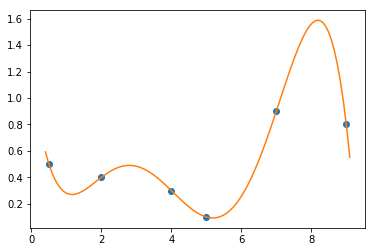

In [73]:
%pylab inline

# Invent some raw data 
x=np.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=np.array([0.5,0.4,0.3,0.1,0.9,0.8])

lp=sitp.lagrange(x, y)

xx= np.linspace(0.4, 9.1, 100)
plot(x,y, "o", xx, lp(xx))
show()

Fit a polynomial of arbitrary degree to a data set. Notice that the object returned is not a function this time and needs to be transformed into a function.

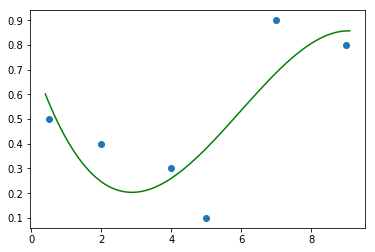

In [79]:
poly_coeffs=numpy.polyfit(x, y, 3)
p3 = numpy.poly1d(poly_coeffs)
plot(x, y, "o", xx, p3(xx), 'g', label='Cubic')
show()

### Optimisation

`scipy.optimise` provides a very wide range of optimisation methods: Newton-like minimization algorithms, least square methods, root finding... 

NB. Examples below are inspired from the official documentation. Interesting examples require setting up complex problems ands exceed the scope of this presentation.

In [82]:
import scipy.optimize as sopt

From a simple 1D problem:

In [84]:
def f(x):
    return -np.exp(-(x - 0.2)**4)
 
result = sopt.minimize_scalar(f)

x_min = result.x
print(x_min)

0.199993594013


To a more complex one:

In [86]:
def f(x):   # rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

sopt.minimize(f, [2,-1], method="Newton-CG", jac=jacobian) 

     fun: 1.5601357400786612e-15
     jac: array([  1.05753092e-07,  -7.48325277e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 0
     nit: 10
    njev: 52
  status: 0
 success: True
       x: array([ 0.99999995,  0.99999988])

### Special functions

`scipy.specials` provides a certain number of useful mathematical functions: Airy functions, Bessel functions, elliptic integrals, gamma function, erf, binomial law, etc. 

# To take home

  * `NumPy`: defines `nd.array` which is an efficient structure for large arrays, matrices and tensors, and functions to manipulate them
  * `SciPy`: defines a lot of user-friendly routines useful for scientific codes
  * Both rely on efficient low level code, and will generally be much faster than if you try to re-implement them yourself
  * Refer to online documentation for a complete list of features: https://docs.scipy.org/doc/